In [1]:
import numpy as np
import pandas as pd
import sys
import tensorflow as tf
import matplotlib.pyplot as plot
import cv2
import os
from os.path import dirname, join
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
test_folder = r'F:\Studying Life\GDipSA\Courses\SA4108\CA\Part II\test\test'
train_folder = r'F:\Studying Life\GDipSA\Courses\SA4108\CA\Part II\train\train'
img_test = load_images_from_folder(test_folder)
img_train = load_images_from_folder(train_folder)

In [4]:
for i in img_test:
    print(i.shape)

(229, 300, 3)
(350, 350, 3)
(720, 720, 3)
(500, 600, 3)
(1749, 1500, 3)
(470, 416, 3)
(745, 800, 3)
(565, 850, 3)
(400, 500, 3)
(282, 425, 3)
(480, 480, 3)
(1300, 1300, 3)
(364, 319, 3)
(2000, 1814, 3)
(573, 960, 3)
(600, 600, 3)
(350, 528, 3)
(448, 673, 3)
(1200, 1920, 3)
(360, 300, 3)
(360, 361, 3)
(797, 1300, 3)
(500, 500, 3)
(547, 766, 3)
(667, 1000, 3)
(355, 630, 3)
(366, 650, 3)
(1506, 2679, 3)
(1980, 1320, 3)
(325, 824, 3)
(549, 732, 3)
(1000, 1000, 3)
(478, 851, 3)
(500, 750, 3)
(355, 344, 3)
(450, 450, 3)
(312, 355, 3)
(535, 800, 3)
(1024, 1009, 3)
(1124, 1500, 3)
(260, 460, 3)
(320, 450, 3)
(549, 732, 3)
(297, 615, 3)
(425, 425, 3)
(1125, 1500, 3)
(990, 1300, 3)
(651, 650, 3)
(800, 800, 3)
(360, 460, 3)
(864, 648, 3)
(360, 480, 3)
(450, 462, 3)
(900, 1200, 3)
(268, 355, 3)
(676, 800, 3)
(254, 390, 3)
(188, 282, 3)
(352, 407, 3)
(1380, 1360, 3)


In [5]:
len(img_test)

60

In [6]:
def image_resize(size, img):
    images_resized = []
    dim = (size, size)
    for i in img:
        resized = cv2.resize(i, dim, interpolation = cv2.INTER_AREA)
        images_resized.append(resized)
    return images_resized

In [7]:
_x_test = image_resize(224, img_test)
for i in _x_test:
    print('Resized Dimensions : ',i.shape)

_x_train = image_resize(224, img_train)

Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 224, 3)
Resized Dimensions :  (224, 

In [8]:
def getLabel(folder):
    label = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            if filename[0] == 'a':
                label.append(0)
            elif filename[0] == 'b':
                label.append(1)
            elif filename[0] == 'm':
                label.append(2)
            elif filename[0] == 'o':
                label.append(3)
    return label

In [9]:
_y_test = getLabel(test_folder)
_y_train = getLabel(train_folder)
len(_y_test)

60

In [10]:
_y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [11]:
x_test = np.array(_x_test)
X = np.array(_x_train)

X.shape

(240, 224, 224, 3)

In [12]:
X = X / 255
x_test = x_test / 255

# convert 1 dimensional array to 4-dimensional array
# each row in y_train and y_test is one-hot encoded
Y = tf.keras.utils.to_categorical(_y_train, 4)
y_test = tf.keras.utils.to_categorical(_y_test, 4)

Y.shape

(240, 4)

In [13]:
print(Y[0:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=1)

Without Data Augmentation

In [15]:
model_s = tf.keras.Sequential()
model_s.add(tf.keras.layers.Conv2D(32, (3, 3), 
    activation='relu', input_shape=(224, 224, 3)))
model_s.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_s.add(tf.keras.layers.Conv2D(32, (3, 3), 
    activation='relu'))
model_s.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_s.add(tf.keras.layers.Conv2D(64, (3, 3), 
    activation='relu'))
model_s.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model_s.add(tf.keras.layers.Flatten())
model_s.add(tf.keras.layers.Dense(64, activation='relu'))
model_s.add(tf.keras.layers.Dropout(0.5))
model_s.add(tf.keras.layers.Dense(4, activation='softmax'))
model_s.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
model_s.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [16]:
hist_n = model_s.fit(x_train, y_train, batch_size=32, epochs=50, verbose=1,validation_data=(x_val, y_val))

Train on 192 samples, validate on 48 samples
Epoch 1/50
192/192 [==============================] - 4s 21ms/sample - loss: 2.0394 - accuracy: 0.3490 - val_loss: 1.2301 - val_accuracy: 0.5833
Epoch 2/50
192/192 [==============================] - 3s 18ms/sample - loss: 1.0966 - accuracy: 0.5938 - val_loss: 0.8372 - val_accuracy: 0.5833
Epoch 3/50
192/192 [==============================] - 3s 18ms/sample - loss: 0.8436 - accuracy: 0.6719 - val_loss: 0.6472 - val_accuracy: 0.7917
Epoch 4/50
192/192 [==============================] - 3s 18ms/sample - loss: 0.6118 - accuracy: 0.8073 - val_loss: 0.5429 - val_accuracy: 0.7917
Epoch 5/50
192/192 [==============================] - 3s 18ms/sample - loss: 0.4786 - accuracy: 0.8333 - val_loss: 0.5174 - val_accuracy: 0.8542
Epoch 6/50
192/192 [==============================] - 3s 18ms/sample - loss: 0.4417 - accuracy: 0.8698 - val_loss: 0.4039 - val_accuracy: 0.8125
Epoch 7/50
192/192 [==============================] - 3s 18ms/sample - loss: 0.3640 -

In [17]:
score = model_s.evaluate(x_test, y_test)
print("score =", score)

60/60 [==============================] - 0s 4ms/sample - loss: 1.4016 - accuracy: 0.8333
score = [1.401577647527059, 0.8333333]


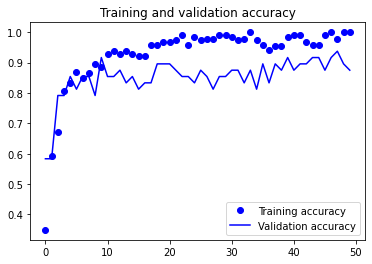

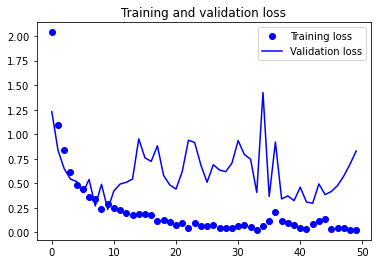

In [40]:
%matplotlib inline

accuracy = hist_n.history['accuracy']
val_accuracy = hist_n.history['val_accuracy']
loss = hist_n.history['loss']
val_loss = hist_n.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Data Augmentation pre model training

In [18]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [19]:
batches = datagen.flow(x_train, y_train, batch_size=32)
val_batches = datagen.flow(x_val, y_val, batch_size=32)

In [20]:
hist_s = model_s.fit(batches, steps_per_epoch=192//32, epochs=50,
          validation_data=val_batches, validation_steps=48//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 1 steps
Epoch 1/50
6/6 [==============================] - 4s 717ms/step - loss: 0.7766 - accuracy: 0.8229 - val_loss: 0.2118 - val_accuracy: 0.9062
Epoch 2/50
6/6 [==============================] - 4s 652ms/step - loss: 0.5958 - accuracy: 0.8177 - val_loss: 0.3590 - val_accuracy: 0.8750
Epoch 3/50
6/6 [==============================] - 4s 645ms/step - loss: 0.5191 - accuracy: 0.8281 - val_loss: 0.2712 - val_accuracy: 0.9062
Epoch 4/50
6/6 [==============================] - 4s 647ms/step - loss: 0.4048 - accuracy: 0.8698 - val_loss: 0.2807 - val_accuracy: 0.8750
Epoch 5/50
6/6 [==============================] - 4s 641ms/step - loss: 0.4229 - accuracy: 0.8594 - val_loss: 0.3783 - val_accuracy: 0.8750
Epoch 6/50
6/6 [==============================] - 4s 663ms/step - loss: 0.4090 - accuracy: 0.8698 - val_loss: 0.4660 - val_accuracy: 0.9062
Epoch 7/50
6/6 [==============================] - 4s 650ms/step - loss

In [21]:
score = model_s.evaluate(x_test, y_test)
print("score =", score)

60/60 [==============================] - 0s 4ms/sample - loss: 1.0129 - accuracy: 0.8500
score = [1.012857695420583, 0.85]


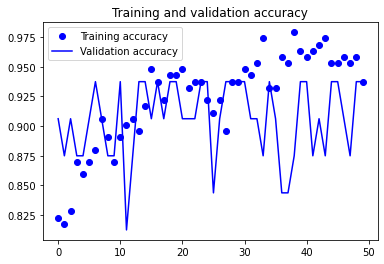

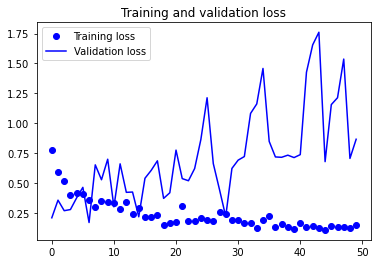

In [41]:
%matplotlib inline

accuracy = hist_s.history['accuracy']
val_accuracy = hist_s.history['val_accuracy']
loss = hist_s.history['loss']
val_loss = hist_s.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Change the size of image

In [44]:
_x_test1 = image_resize(180, img_test)
_x_train1 = image_resize(180, img_train)

In [45]:
x_test1 = np.array(_x_test1)
X1 = np.array(_x_train1)


In [46]:
X1 = X1 / 255
x_test1 = x_test1 / 255

In [47]:
x_train1, x_val1, y_train1, y_val1 = train_test_split(X1, Y, test_size=0.2, random_state=2)

In [48]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3, 3), 
    activation='relu', input_shape=(180, 180, 3)))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(32, (3, 3), 
    activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), 
    activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(4, activation='softmax'))
model1.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 41, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)            

In [49]:
hist1 = model1.fit(x_train1, y_train1, batch_size=32, epochs=50, verbose=1,validation_data=(x_val1, y_val1))

Train on 192 samples, validate on 48 samples
Epoch 1/50
192/192 [==============================] - 3s 14ms/sample - loss: 1.9483 - accuracy: 0.3021 - val_loss: 1.3694 - val_accuracy: 0.3333
Epoch 2/50
192/192 [==============================] - 2s 11ms/sample - loss: 1.2966 - accuracy: 0.4062 - val_loss: 1.4551 - val_accuracy: 0.3750
Epoch 3/50
192/192 [==============================] - 2s 11ms/sample - loss: 1.1319 - accuracy: 0.5052 - val_loss: 1.1506 - val_accuracy: 0.5417
Epoch 4/50
192/192 [==============================] - 2s 11ms/sample - loss: 1.0092 - accuracy: 0.6302 - val_loss: 0.9250 - val_accuracy: 0.7292
Epoch 5/50
192/192 [==============================] - 2s 11ms/sample - loss: 0.8172 - accuracy: 0.7031 - val_loss: 0.8316 - val_accuracy: 0.7292
Epoch 6/50
192/192 [==============================] - 2s 11ms/sample - loss: 0.6967 - accuracy: 0.7552 - val_loss: 0.7346 - val_accuracy: 0.7292
Epoch 7/50
192/192 [==============================] - 2s 12ms/sample - loss: 0.5197 -

In [50]:
score = model1.evaluate(x_test1, y_test)
print("score =", score)

60/60 [==============================] - 0s 3ms/sample - loss: 1.0848 - accuracy: 0.9000
score = [1.0847986300786336, 0.9]


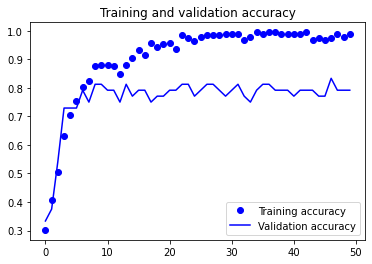

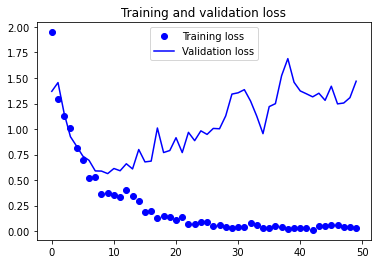

In [51]:
%matplotlib inline

accuracy = hist1.history['accuracy']
val_accuracy = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

With Data Augmentation

In [52]:
batches1 = datagen.flow(x_train1, y_train1, batch_size=32)
val_batches1 = datagen.flow(x_val1, y_val1, batch_size=32)

In [53]:
hist1_ = model1.fit(batches1, steps_per_epoch=192//32, epochs=50,
          validation_data=val_batches1, validation_steps=48//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 1 steps
Epoch 1/50
6/6 [==============================] - 3s 466ms/step - loss: 0.6733 - accuracy: 0.8438 - val_loss: 0.6084 - val_accuracy: 0.7812
Epoch 2/50
6/6 [==============================] - 2s 416ms/step - loss: 0.4115 - accuracy: 0.8906 - val_loss: 0.7522 - val_accuracy: 0.8125
Epoch 3/50
6/6 [==============================] - 2s 407ms/step - loss: 0.5013 - accuracy: 0.8750 - val_loss: 0.4281 - val_accuracy: 0.8438
Epoch 4/50
6/6 [==============================] - 3s 421ms/step - loss: 0.4651 - accuracy: 0.8698 - val_loss: 0.6031 - val_accuracy: 0.7812
Epoch 5/50
6/6 [==============================] - 2s 415ms/step - loss: 0.2953 - accuracy: 0.9115 - val_loss: 0.4212 - val_accuracy: 0.8438
Epoch 6/50
6/6 [==============================] - 2s 412ms/step - loss: 0.3067 - accuracy: 0.9010 - val_loss: 0.4567 - val_accuracy: 0.8438
Epoch 7/50
6/6 [==============================] - 3s 423ms/step - loss

In [54]:
score = model1.evaluate(x_test1, y_test)
print("score =", score)

60/60 [==============================] - 0s 3ms/sample - loss: 0.5287 - accuracy: 0.9000
score = [0.5286532362302144, 0.9]


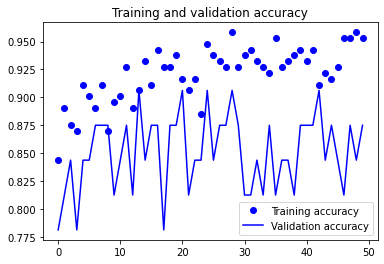

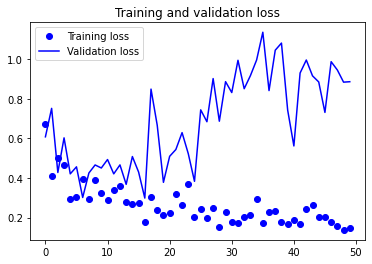

In [55]:
%matplotlib inline

accuracy = hist1_.history['accuracy']
val_accuracy = hist1_.history['val_accuracy']
loss = hist1_.history['loss']
val_loss = hist1_.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()